In [24]:
from datetime import datetime, timedelta 
import time
import requests
import pandas as pd
import lxml
from lxml import html

In [2]:
def format_date(date_datetime):
     date_timetuple = date_datetime.timetuple()
     date_mktime = time.mktime(date_timetuple)
     date_int = int(date_mktime)
     date_str = str(date_int)
     return date_str
    

In [4]:
def subdomain(symbol, start, end, filter='history'):
     subdoma="/quote/{0}/history?period1={1}&period2={2}&interval=1d&filter={3}&frequency=1d"
     subdomain = subdoma.format(symbol, start, end, filter)
     return subdomain
 

In [5]:
def header_function(subdomain):
     hdrs =  {"authority": "finance.yahoo.com",
              "method": "GET",
              "path": subdomain,
              "scheme": "https",
              "accept": "text/html",
              "accept-encoding": "gzip, deflate, br",
              "accept-language": "en-US,en;q=0.9",
              "cache-control": "no-cache",
              "dnt": "1",
              "pragma": "no-cache",
              "sec-fetch-mode": "navigate",
              "sec-fetch-site": "same-origin",
              "sec-fetch-user": "?1",
              "upgrade-insecure-requests": "1",
              "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64)"}
     
     return hdrs
    

In [6]:
def scrape_page(url, header):
     page = requests.get(url, headers=header)
     element_html = html.fromstring(page.content)
     table = element_html.xpath('//table')
     table_tree = lxml.etree.tostring(table[0], method='xml')
     panda = pd.read_html(table_tree)
     return panda

In [7]:
if __name__ == '__main__':
     symbol = 'PEB'
     
     dt_start = datetime.today() - timedelta(days=365)
     dt_end = datetime.today()
    
     start = format_date(dt_start)
     end = format_date(dt_end)
     
     sub = subdomain(symbol, start, end)
     header = header_function(sub)
     
     base_url = 'https://finance.yahoo.com'
     url = base_url + sub
     price_history = scrape_page(url, header)

In [14]:
df = price_history[0]

0                                                  20.25
1                                                  19.97
2                                                  19.23
3                                                  18.30
4                                                  18.38
                             ...                        
96                                                 12.11
97                                                 13.07
98                                                 13.91
99                                                 13.99
100    *Close price adjusted for splits.**Adjusted cl...
Name: Close*, Length: 101, dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         101 non-null    object
 1   Open         101 non-null    object
 2   High         101 non-null    object
 3   Low          101 non-null    object
 4   Close*       101 non-null    object
 5   Adj Close**  101 non-null    object
 6   Volume       101 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB


In [26]:
df_filtered = df[df['Date']!= "*Close price adjusted for splits.**Adjusted close price adjusted for both dividends and splits."]

In [49]:
df_filtered['Date']=pd.to_datetime(df_filtered['Date'])

<ipython-input-49-dd3ba4d90744>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date']=pd.to_datetime(df_filtered['Date'])


In [47]:
num_cols=df_filtered.columns.drop('Date')

In [51]:
df_filtered[num_cols] = df_filtered[num_cols].apply(pd.to_numeric, errors='coerce')

c:\users\w4k3k\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
df_filtered

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2021-02-04,19.48,20.47,18.92,20.25,20.25,2111317.0
1,2021-02-03,19.17,19.97,18.98,19.97,19.97,1567300.0
2,2021-02-02,18.54,19.27,18.29,19.23,19.23,1441400.0
3,2021-02-01,18.47,18.56,17.57,18.30,18.30,2332200.0
4,2021-01-29,19.22,19.28,18.25,18.38,18.38,1864300.0
...,...,...,...,...,...,...,...
95,2020-09-22,12.20,12.46,12.05,12.11,12.09,2533500.0
96,2020-09-21,12.68,12.68,11.99,12.11,12.09,2860600.0
97,2020-09-18,14.04,14.04,13.00,13.07,13.05,3989400.0
98,2020-09-17,13.79,14.21,13.59,13.91,13.89,2379600.0


In [55]:
import matplotlib.pyplot as plt
from matplotlib import style

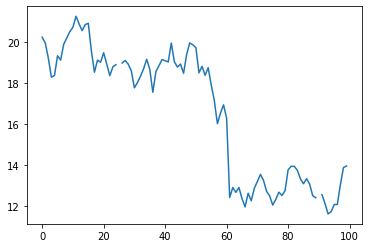

In [59]:
df_filtered['Adj Close**'].plot()
plt.show()

In [62]:
df_filtered =df_filtered.set_index('Date')

In [61]:
df_filtered

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2021-02-04,19.48,20.47,18.92,20.25,20.25,2111317.0
1,2021-02-03,19.17,19.97,18.98,19.97,19.97,1567300.0
2,2021-02-02,18.54,19.27,18.29,19.23,19.23,1441400.0
3,2021-02-01,18.47,18.56,17.57,18.30,18.30,2332200.0
4,2021-01-29,19.22,19.28,18.25,18.38,18.38,1864300.0
...,...,...,...,...,...,...,...
95,2020-09-22,12.20,12.46,12.05,12.11,12.09,2533500.0
96,2020-09-21,12.68,12.68,11.99,12.11,12.09,2860600.0
97,2020-09-18,14.04,14.04,13.00,13.07,13.05,3989400.0
98,2020-09-17,13.79,14.21,13.59,13.91,13.89,2379600.0


In [63]:
df_filtered

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2021-02-04,19.48,20.47,18.92,20.25,20.25,2111317.0
2021-02-03,19.17,19.97,18.98,19.97,19.97,1567300.0
2021-02-02,18.54,19.27,18.29,19.23,19.23,1441400.0
2021-02-01,18.47,18.56,17.57,18.30,18.30,2332200.0
2021-01-29,19.22,19.28,18.25,18.38,18.38,1864300.0
...,...,...,...,...,...,...
2020-09-22,12.20,12.46,12.05,12.11,12.09,2533500.0
2020-09-21,12.68,12.68,11.99,12.11,12.09,2860600.0
2020-09-18,14.04,14.04,13.00,13.07,13.05,3989400.0


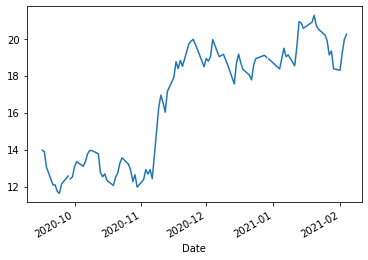

In [64]:
df_filtered['Adj Close**'].plot()
plt.show()